In [1]:
import numpy as np
import sklearn
import seaborn as sns
import pandas as pd
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
iris_data = load_iris()

df = pd.DataFrame(iris_data.data, columns = iris_data.feature_names)
df['class'] = iris_data.target
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [3]:
# 결측치 제거
df = df.dropna()
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
class                0
dtype: int64

Text(0.5, 1.0, 'iris')

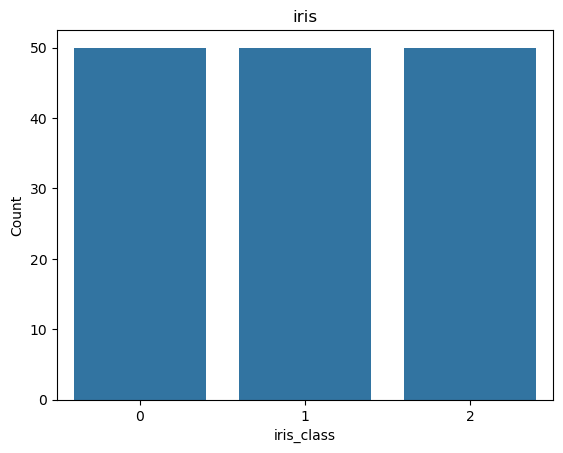

In [4]:
# 레이블 갯수 확인 (그래프)
sns.countplot(data = df, x="class")
plt.xlabel("iris_class")
plt.ylabel("Count")
plt.title("iris")

In [5]:
# 레이블 갯수 확인 (숫자)
df['class'].value_counts()

class
0    50
1    50
2    50
Name: count, dtype: int64

C:\Users\user\AppData\Local\Temp\ipykernel_12384\753496746.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['sepal length (cm)'], kde = True, hist = False, ax=ax1)
C:\Users\user\AppData\Local\Temp\ipykernel_12384\753496746.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['s

<Axes: xlabel='petal width (cm)', ylabel='Density'>

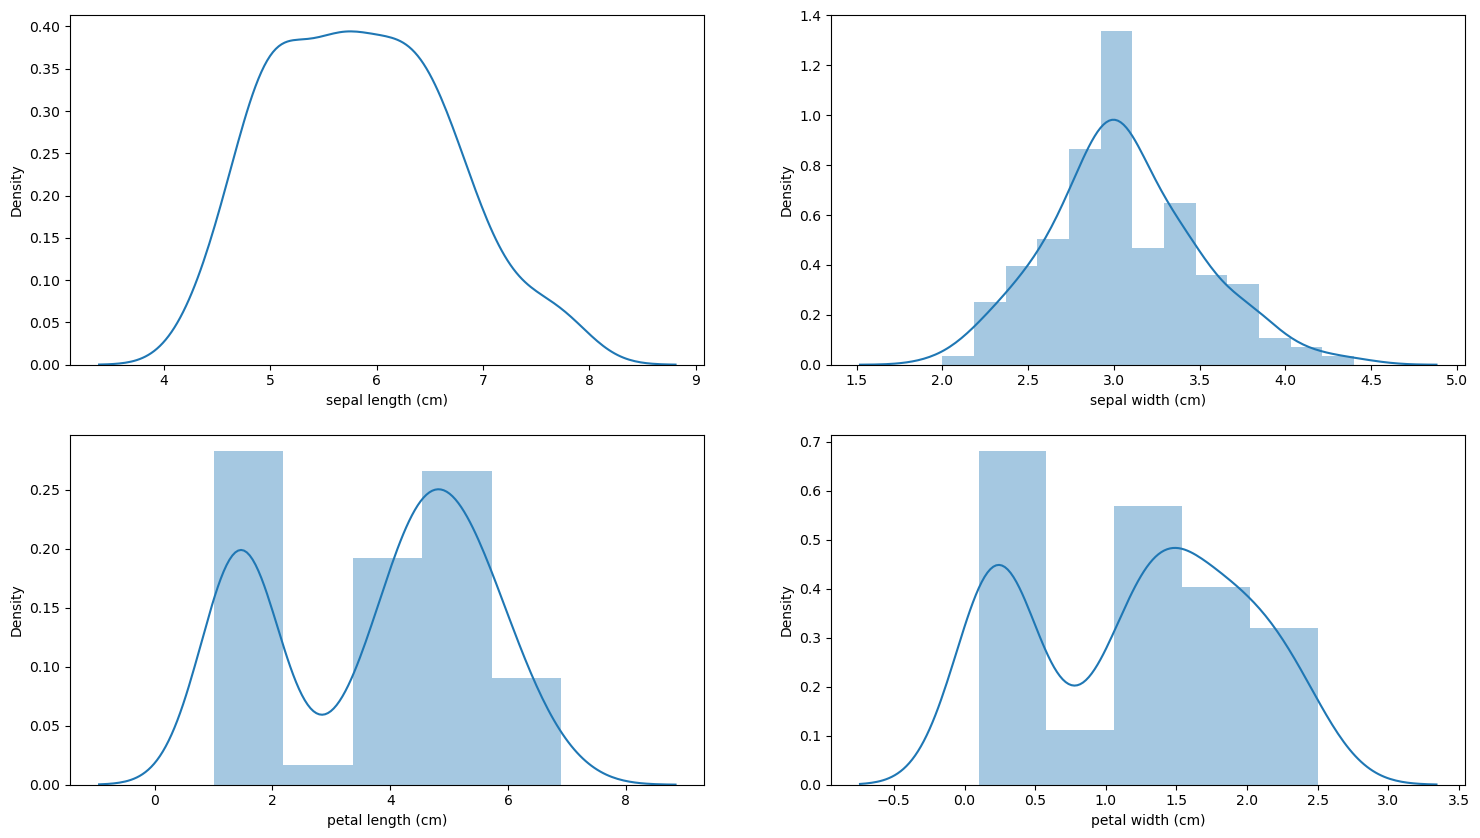

In [6]:
# 컬럼별 히스토그램 확인

#18인치, 6인치로 그림 생성
figure = plt.figure(figsize=(18,10))
#1행 2열의 첫번째에 위치
ax1 = plt.subplot(2,2,1)
 #kde 선그래프, hist 막대그래프, kde->커널 밀도 추정
sns.distplot(df['sepal length (cm)'], kde = True, hist = False, ax=ax1)
ax2 = plt.subplot(2,2,2)
sns.distplot(df['sepal width (cm)'], ax=ax2)
ax3 = plt.subplot(2,2,3)
sns.distplot(df['petal length (cm)'], ax=ax3)
ax4 = plt.subplot(2,2,4)
sns.distplot(df['petal width (cm)'], ax=ax4)

In [7]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'class'],
      dtype='object')

In [8]:
X=df.drop('class', axis=1)

X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [9]:
y=df['class']
y.value_counts()

class
0    50
1    50
2    50
Name: count, dtype: int64

In [10]:
#원-핫 엔코딩
y = pd.get_dummies(y).values
y

array([[ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ T

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [12]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape 
#의미? 112개의 샘플에 4개의 특성의미

((112, 4), (38, 4), (112, 3), (38, 3))

In [29]:
#모델 생성

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam


model = Sequential()

model.add(Dense(16,input_shape=(X_train.shape[1],),activation='relu')) #imput_shape->입력층
model.add(Dense(12,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(3,activation='softmax')) #다층 퍼셉트론 -> softmax / 퍼셉트론 -> sigmoid, 출력층은 class갯수가 되도록

model.compile(Adam(learning_rate=0.04),'categorical_crossentropy',metrics=['accuracy'])

model.summary()

C:\Users\user\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                     │ (None, 16)                  │              80 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 12)                  │             204 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 8)                   │             104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 3)                   │              27 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 415 (1.62 KB)

 Trainable params: 415 (1.62 KB)

 Non-trainable params: 0 (0.00 B)

In [30]:
model_history=model.fit(x=X_train, y=y_train, epochs=30, batch_size=60,validation_data=(X_test,y_test))
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

Epoch 1/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 229ms/step - accuracy: 0.1306 - loss: 1.4149 - val_accuracy: 0.7105 - val_loss: 0.9516
Epoch 2/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.5615 - loss: 1.0193 - val_accuracy: 0.3684 - val_loss: 0.9609
Epoch 3/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.3782 - loss: 0.9653 - val_accuracy: 0.4211 - val_loss: 0.8997
Epoch 4/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.5726 - loss: 0.8694 - val_accuracy: 0.3421 - val_loss: 0.9196
Epoch 5/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.5079 - loss: 0.7998 - val_accuracy: 0.5789 - val_loss: 0.6954
Epoch 6/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7198 - loss: 0.6160 - val_accuracy: 0.5789 - val_loss: 0.6149
Epoch 7/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6865 - loss: 0.5683 - val_accuracy: 0.5789 - val_loss: 0.5350
Epoch 8/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7310 - loss: 0.4814 - val_accuracy: 0.5789 - val_loss: 0.5334

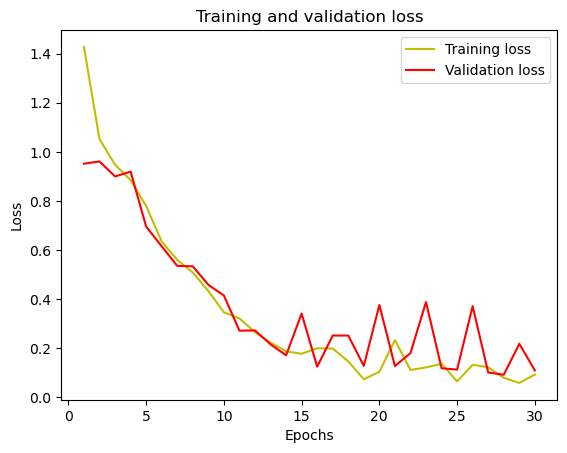

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

loss =model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

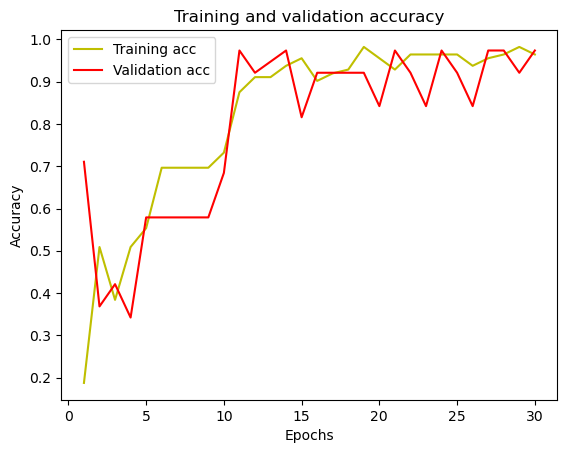

In [32]:
acc =model_history.history['accuracy']
val_acc =model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()